In [3]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge, Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

2024-11-18 15:32:29.073554: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
from statsmodels.tsa.seasonal import STL

In [ ]:
loc = 1
train_file = os.path.join(os.getcwd(), "data/avg_data_10min_wh/loc_{i}/fold_4/train.csv".format(i=loc))
train_set = pd.read_csv(train_file, encoding='utf-8')
train_set.head()

In [88]:
train_set.columns

Index(['DateTime', 'LocationCode', 'WindSpeed(m/s)', 'Pressure(hpa)',
       'Temperature(°C)', 'Humidity(%)', 'Sunlight(Lux)', 'Power(mW)'],
      dtype='object')

In [107]:
df = train_set.copy()
col_log = np.log(df['Pressure(hpa)'] + 1)

# col = col_log.diff(periods=1)
# col[0] = col[1]
col = col_log
imputed_idx = df[col.isna()].index

stl = STL(col.interpolate('linear'), period=60*30, seasonal=61)
res = stl.fit()

seasonal_component = res.seasonal

df_deseason = col - seasonal_component
df_deseason_imputed = df_deseason.interpolate(method='linear')

df_imputed = df_deseason_imputed + seasonal_component
df_imputed.head()

0    6.925330
1    6.925373
2    6.925519
3    6.925587
4    6.925688
dtype: float64

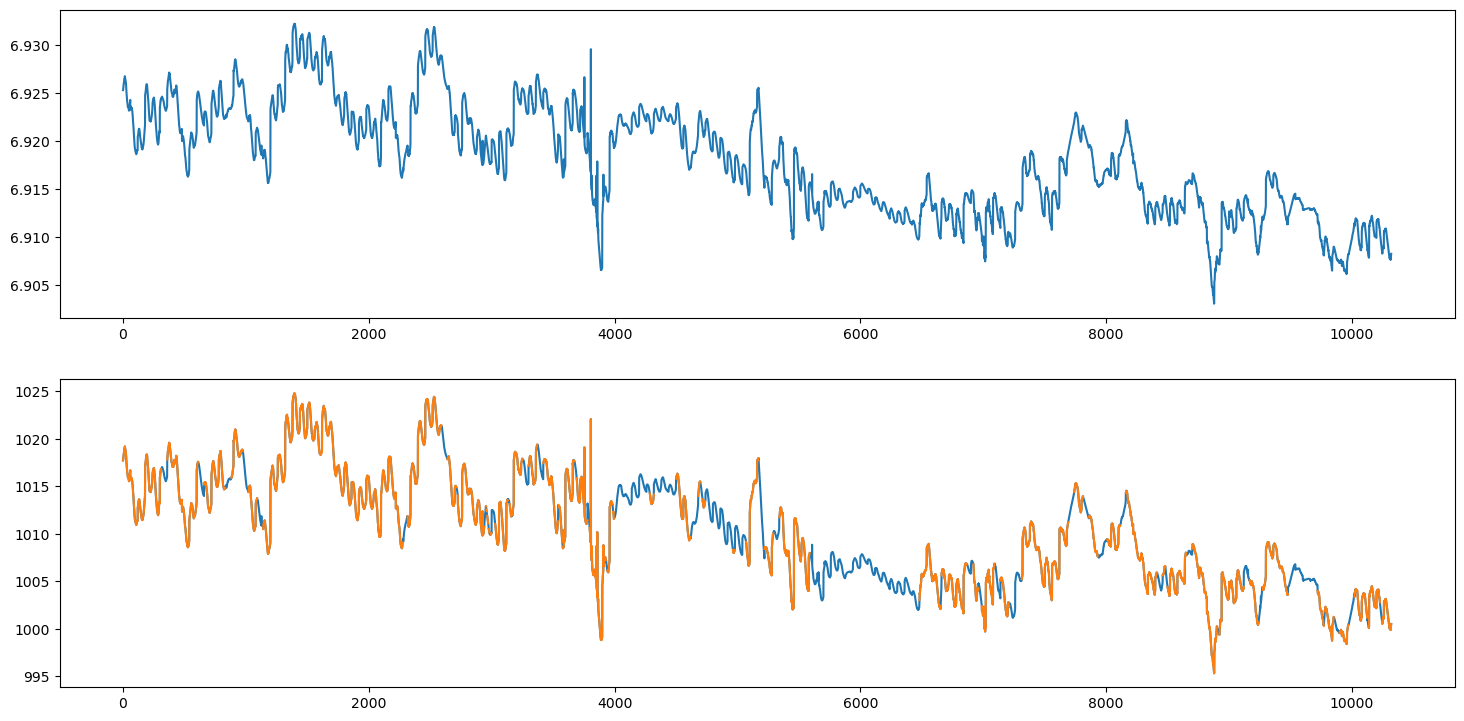

In [108]:
plt.figure(figsize = (18, 28))

plt.subplot(6, 1, 1)
plt.plot(df_imputed)

plt.subplot(6, 1, 2)
plt.plot(np.exp(df_imputed))

plt.subplot(6, 1, 2)
plt.plot(np.exp(col_log))

In [21]:
loc = 1
train_file = os.path.join(os.getcwd(), "data/add_lag_diff/loc_{i}.csv".format(i=loc))
train_set = pd.read_csv(train_file, encoding='utf-8')
train_set.head()

,DateTime,LocationCode,Serial,WindSpeed(m/s),Pressure(hpa),Temperature(°C),Humidity(%),Sunlight(Lux),Power(mW),WindSpeed(m/s)_lag1,...,Power(mW)_lag60,Power(mW)_diff1,Power(mW)_diff60,Power(mW)_diff_1_60,Power(mW)_log,Power(mW)_lag1_log,Power(mW)_lag60_log,Power(mW)_diff1_log,Power(mW)_diff60_log,Power(mW)_diff_1_60_log
0,2024-01-01 07:00:00,1.0,20240101070001,0.00000,1016.730,17.50,86.99,470.834,0.083,0.00000,...,8.296,0.056,8.213,8.179,0.079735,0.130151,2.229584,0.050416,2.149849,2.119957
1,2024-01-01 07:10:00,1.0,20240101071001,0.00000,1016.774,17.57,86.97,659.667,0.139,0.00000,...,35.990,0.056,35.851,27.638,0.130151,0.130151,3.610648,0.050416,3.480497,1.330648
2,2024-01-01 07:20:00,1.0,20240101072001,0.68193,1016.922,17.63,86.18,889.666,0.247,0.68193,...,28.905,0.108,28.658,-7.193,0.220741,0.220741,3.398026,0.090590,3.177285,-0.303212
3,2024-01-01 07:30:00,1.0,20240101073001,0.60737,1016.992,17.74,85.41,1263.833,0.447,0.60737,...,101.449,0.200,101.002,72.344,0.369492,0.369492,4.629365,0.148752,4.259873,1.082588
4,2024-01-01 07:40:00,1.0,20240101074001,0.00000,1017.094,17.90,85.41,2136.833,1.129,0.00000,...,265.023,0.682,263.894,162.892,0.755652,0.755652,5.583583,0.386160,4.827930,0.568058


In [22]:
train_set.columns

Index(['DateTime', 'LocationCode', 'Serial', 'WindSpeed(m/s)', 'Pressure(hpa)',
       'Temperature(°C)', 'Humidity(%)', 'Sunlight(Lux)', 'Power(mW)',
       'WindSpeed(m/s)_lag1', 'WindSpeed(m/s)_lag60', 'WindSpeed(m/s)_diff1',
       'WindSpeed(m/s)_diff60', 'WindSpeed(m/s)_diff_1_60',
       'WindSpeed(m/s)_log', 'WindSpeed(m/s)_lag1_log',
       'WindSpeed(m/s)_lag60_log', 'WindSpeed(m/s)_diff1_log',
       'WindSpeed(m/s)_diff60_log', 'WindSpeed(m/s)_diff_1_60_log',
       'Pressure(hpa)_lag1', 'Pressure(hpa)_lag60', 'Pressure(hpa)_diff1',
       'Pressure(hpa)_diff60', 'Pressure(hpa)_diff_1_60', 'Pressure(hpa)_log',
       'Pressure(hpa)_lag1_log', 'Pressure(hpa)_lag60_log',
       'Pressure(hpa)_diff1_log', 'Pressure(hpa)_diff60_log',
       'Pressure(hpa)_diff_1_60_log', 'Temperature(°C)_lag1',
       'Temperature(°C)_lag60', 'Temperature(°C)_diff1',
       'Temperature(°C)_diff60', 'Temperature(°C)_diff_1_60',
       'Temperature(°C)_log', 'Temperature(°C)_lag1_log',
       'T

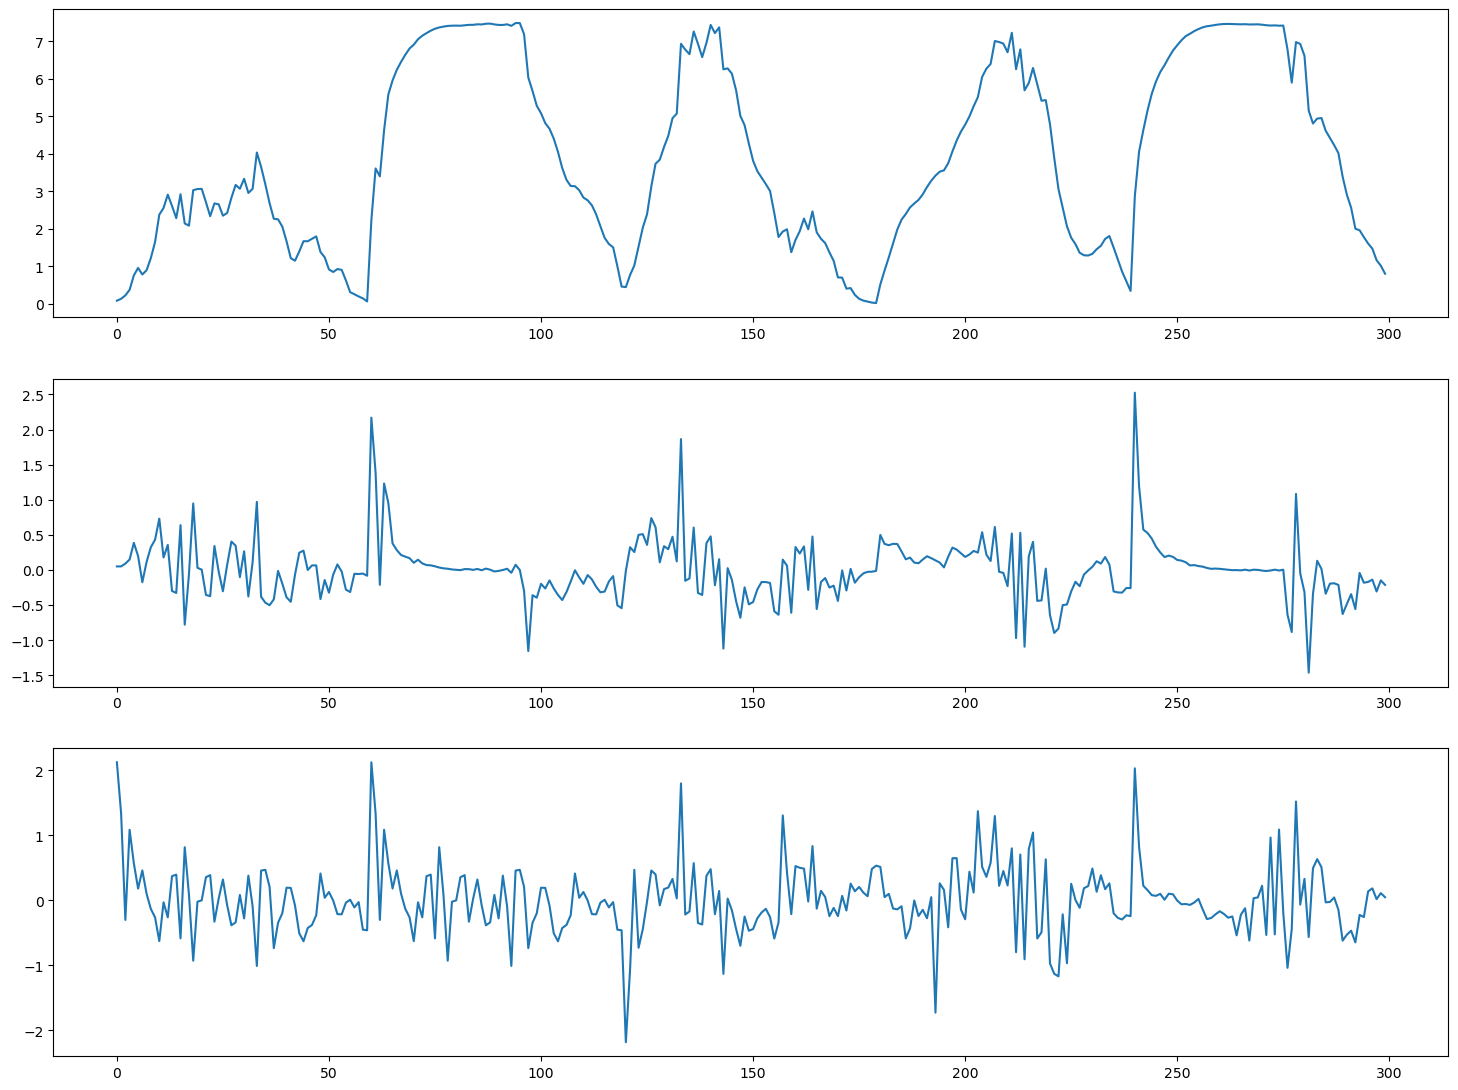

In [23]:
plt.figure(figsize = (18, 28))

plt.subplot(6, 1, 1)
plt.plot(train_set['Power(mW)_log'][:300])

col = 'Power(mW)_diff1_log'
plt.subplot(6, 1, 2)
plt.plot(train_set[col][:300])

col = 'Power(mW)_diff_1_60_log'
plt.subplot(6, 1, 3)
plt.plot(train_set[col][:300])